In [1]:
# !python -m venv myenv
!source myenv/bin/activate
# !pip install --upgrade pip setuptools
# !pip install torch torchvision pytorch-gradcam matplotlib lime timm grad-cam

In [1]:
# !pip install jupyterlab ipykernel
# !python -m ipykernel install --user --name=myenv --display-name "Python (myenv)"
# unrar x -o+ Visualization.rar

In [1]:
import os
import pandas as pd
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
from soyatrans import SoyaTrans

/home/ubuntu/myenv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/ubuntu/myenv/lib/python3.10/site-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)


In [3]:
model = SoyaTrans(5)
state_dict = torch.load("soyatrans_nirmal.pth", map_location="cuda")
model.load_state_dict(state_dict)

/home/ubuntu/myenv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/ubuntu/myenv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /home/ubuntu/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:01<00:00, 341MB/s] 
/home/ubuntu/myenv/lib/python3.10/site-packages/torch/functional.py:539: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Trig

<All keys matched successfully>

100%|██████████| 8/8 [00:45<00:00,  5.67s/it]


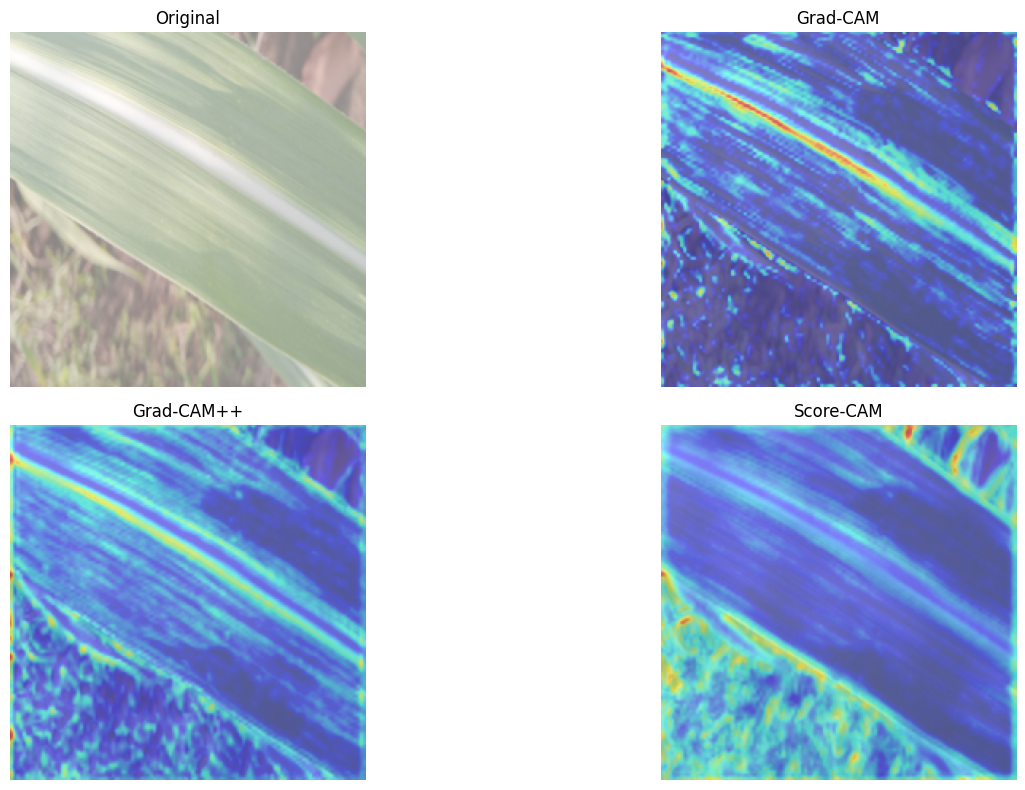

In [13]:
from pytorch_grad_cam import GradCAM, GradCAMPlusPlus, ScoreCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
import numpy as np
import matplotlib.pyplot as plt

# Load image and class index
image, class_index = dataset[0]
input_tensor = image.unsqueeze(0)

# Convert tensor to RGB image
def tensor_to_rgb_image(tensor):
    img = tensor.clone().detach().cpu()
    img = img * 0.5 + 0.5  # reverse normalization
    img = img.permute(1, 2, 0).numpy()
    img = np.clip(img, 0, 1)
    return img

rgb_img = tensor_to_rgb_image(image)

# Target layer for CAM
target_layers = [model.vgg.vgg[8]]
# target_layers = [model.inception.stage4[0]
# target_layers = [model.stage1.downsample]
target = [ClassifierOutputTarget(class_index)]

# Initialize CAMs
cams = {
    "Grad-CAM": GradCAM(model=model, target_layers=target_layers),
    "Grad-CAM++": GradCAMPlusPlus(model=model, target_layers=target_layers),
    "Score-CAM": ScoreCAM(model=model, target_layers=target_layers)
}

# Run CAMs
cam_results = {"Original": rgb_img}
for name, cam_method in cams.items():
    grayscale_cam = cam_method(input_tensor=input_tensor, targets=target)[0]
    cam_image = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)
    cam_results[name] = cam_image

# Plot all results
plt.figure(figsize=(16, 8))
for idx, (name, img) in enumerate(cam_results.items()):
    plt.subplot(2, 2, idx + 1)
    plt.imshow(img)
    plt.title(name)
    plt.axis("off")
plt.tight_layout()
plt.show()

In [15]:
from pytorch_grad_cam import GradCAM, GradCAMPlusPlus, ScoreCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
import numpy as np
import matplotlib.pyplot as plt

# Load image and class index
image, class_index = dataset[0]
input_tensor = image.unsqueeze(0)

# Convert tensor to RGB image
def tensor_to_rgb_image(tensor):
    img = tensor.clone().detach().cpu()
    img = img * 0.5 + 0.5  # reverse normalization
    img = img.permute(1, 2, 0).numpy()
    img = np.clip(img, 0, 1)
    return img

rgb_img = tensor_to_rgb_image(image)

# Target layer for CAM
# target_layers = [model.vgg.vgg[8]]
target_layers = [model.inception.stage4[0]]
# target_layers = [model.stage1.downsample]
target = [ClassifierOutputTarget(class_index)]

# Initialize CAMs
cams = {
    "Grad-CAM": GradCAM(model=model, target_layers=target_layers),
    "Grad-CAM++": GradCAMPlusPlus(model=model, target_layers=target_layers),
    "Score-CAM": ScoreCAM(model=model, target_layers=target_layers)
}

# Run CAMs
cam_results = {"Original": rgb_img}
for name, cam_method in cams.items():
    grayscale_cam = cam_method(input_tensor=input_tensor, targets=target)[0]
    cam_image = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)
    cam_results[name] = cam_image

# Plot all results
plt.figure(figsize=(16, 8))
for idx, (name, img) in enumerate(cam_results.items()):
    plt.subplot(2, 2, idx + 1)
    plt.imshow(img)
    plt.title(name)
    plt.axis("off")
plt.tight_layout()
plt.show()

AttributeError: 'InceptionV7' object has no attribute 'stage4'

100%|██████████| 32/32 [03:03<00:00,  5.72s/it]


  0%|          | 0/1000 [00:00<?, ?it/s]

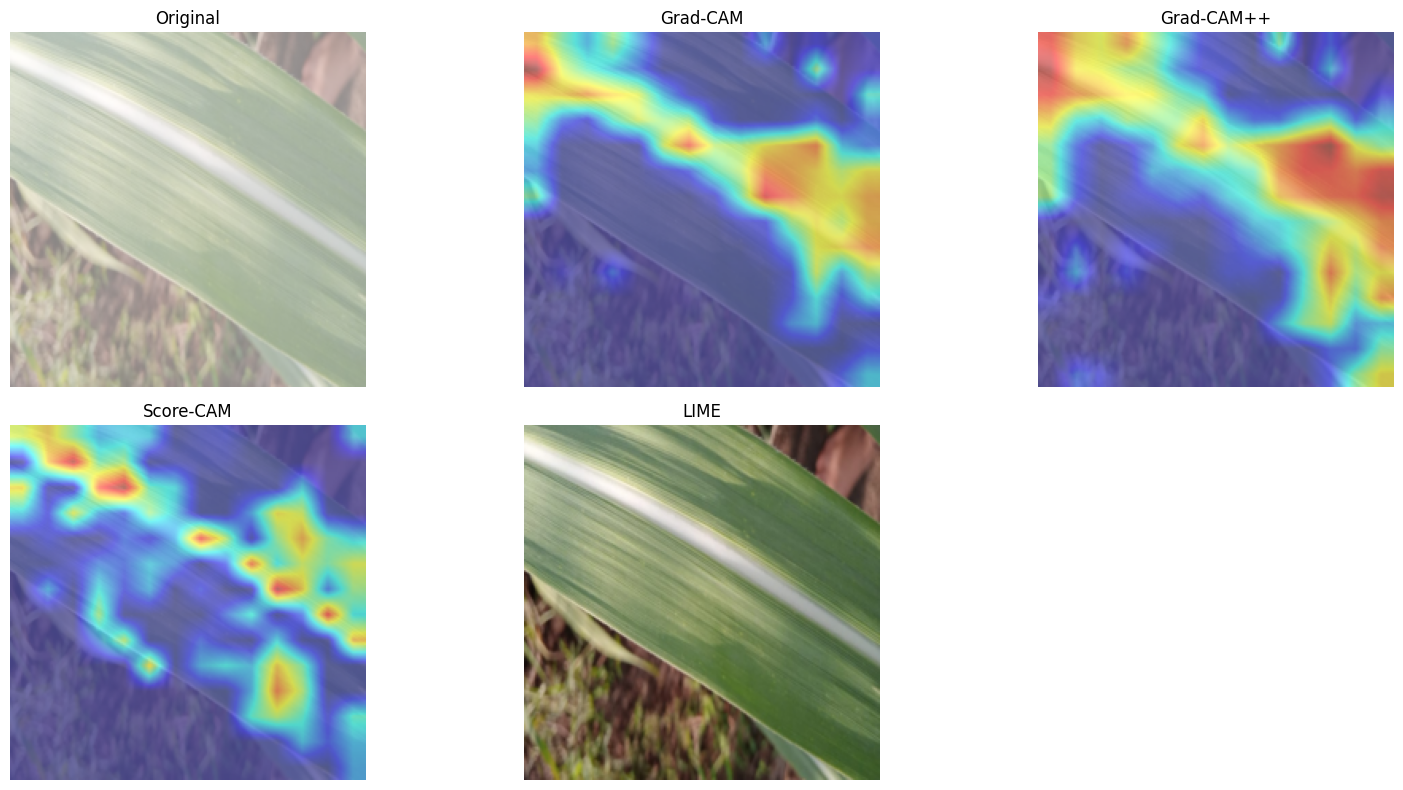

In [ ]:
from pytorch_grad_cam import GradCAM, GradCAMPlusPlus, ScoreCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
from lime import lime_image
from skimage.segmentation import slic

# Load image and class index
image, class_index = dataset[0]
input_tensor = image.unsqueeze(0)

# Convert tensor to RGB image
def tensor_to_rgb_image(tensor):
    img = tensor.clone().detach().cpu()
    img = img * 0.5 + 0.5  # reverse normalization
    img = img.permute(1, 2, 0).numpy()
    img = np.clip(img, 0, 1)
    return img

rgb_img = tensor_to_rgb_image(image)

# Target layer for CAM
# target_layers = [model.vgg.vgg[8]]
# target_layers = [model.inception.stage4[0]]
target_layers = [model.stage1.downsample]
target = [ClassifierOutputTarget(class_index)]

# LIME explanation
def lime_explanation(image, model, class_index):
    # Preprocess the image for LIME (needs to be in [0,1] range)
    image = image.cpu().numpy().transpose(1, 2, 0)  # C H W -> H W C
    image = np.clip(image, 0, 1)
    
    # Use LIME with SLIC segmentation
    explainer = lime_image.LimeImageExplainer()
    
    def predict_fn(images):
        # Make sure the images are in the correct format (N, H, W, C)
        images_tensor = torch.tensor(images).permute(0, 3, 1, 2).float()
        outputs = model(images_tensor)
        return F.softmax(outputs, dim=1).detach().cpu().numpy()

    # Get explanation from LIME
    explanation = explainer.explain_instance(image, predict_fn, top_labels=5, hide_color=0, num_samples=1000)
    
    # Get the image of the explanation for the target class index
    temp, mask = explanation.get_image_and_mask(class_index, positive_only=True, num_features=10, hide_rest=False)
    return temp

# Get LIME explanation image
lime_img = lime_explanation(image, model, class_index)
# Initialize CAMs
cams = {
    "Grad-CAM": GradCAM(model=model, target_layers=target_layers),
    "Grad-CAM++": GradCAMPlusPlus(model=model, target_layers=target_layers),
    "Score-CAM": ScoreCAM(model=model, target_layers=target_layers)
}

# Run CAMs
cam_results = {"Original": rgb_img}
for name, cam_method in cams.items():
    grayscale_cam = cam_method(input_tensor=input_tensor, targets=target)[0]
    cam_image = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)
    cam_results[name] = cam_image
    
cam_results["LIME"] = lime_img

# Plot all results
plt.figure(figsize=(16, 8))
for idx, (name, img) in enumerate(cam_results.items()):
    plt.subplot(2, 3, idx + 1)
    plt.imshow(img)
    plt.title(name)
    plt.axis("off")
plt.tight_layout()
plt.show()